# Simulating Nazanin's Pulse from ND HNLF

In [1]:
import sys
sys.path.append("C:\\Users\\pchan\\Documents\\GitHub\\FourWaveMixing-and-Intrapulse-DFG-using-PyNLO")
import numpy as np
import matplotlib.pyplot as plt
import Fiber_PPLN_NLSE as fpn
import clipboard_and_style_sheet

clipboard_and_style_sheet.style_sheet()


def normalize(vec):
    return vec / np.max(abs(vec))


path = 'C:/Users/pchan/Documents/Research Projects/PyNLO_project_for_new_system_design/Nazanin_FROG_pulse' \
       '/Recunstructed FROG_ 21fs pulse/'

data_temp = np.genfromtxt(path + 'ReconstructedPulseTemporal.txt')
data_spec = np.genfromtxt(path + 'ReconstructedPulseSpectrum.txt')
center_wavelength_nm = data_spec[:, 2][len(data_spec) // 2] * 1e3


# don't forget to negate the phase
def get_data(string):
    if string == 'temp':
        # data_temp = np.genfromtxt(path + 'ReconstructedPulseTemporal.txt')
        pulse = fpn.Pulse(center_wavelength_nm=center_wavelength_nm, EPP_nJ=1.4)
        amp = np.sqrt(data_temp[:, 0])
        phase = - data_temp[:, 1]
        T_ps = data_temp[:, 2] / 1000
        AT = amp * np.exp(1j * phase)
        pulse.set_AT_experiment(T_ps, AT)
    elif string == 'spec':
        # data_spec = np.genfromtxt(path + 'ReconstructedPulseSpectrum.txt')
        pulse = fpn.Pulse(center_wavelength_nm=center_wavelength_nm, EPP_nJ=1.4)
        lamda = data_spec[:, 2]
        phase = - data_spec[:, 1]
        amp = np.sqrt(data_spec[:, 0])
        AW = amp * np.exp(1j * phase)
        pulse.set_AW_experiment(lamda, AW)
    else:
        raise ValueError('string should be either temp or spec')
    return pulse


class Evol:
    def __init__(self, evol):
        self.pulse = evol.pulse
        self.AW2d = evol.AW
        self.zs = evol.zs * 1e3

        toplot = abs(self.AW2d) ** 2
        toplot = (toplot.T / np.max(toplot, axis=1)).T
        self.toplot = toplot

    def plot_2dwindow(self, ll_um, ul_um, ax=None):
        cond = np.logical_and(self.pulse.wl_um >= ll_um, self.pulse.wl_um <= ul_um)
        ind = np.where(cond)
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.pcolormesh(self.pulse.wl_um[ind], self.zs, self.toplot.T[ind].T, shading='auto', cmap='jet')
        ax.set_xlabel('wavelength ($\mathrm{\mu m}$)')
        ax.set_ylabel("z (mm)")

    def plot_1dwindow(self, ax=None):
        ind = np.where(self.pulse.wl_um >= 0)
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.semilogy(self.pulse.wl_um[ind], normalize(abs(self.pulse.AW[ind]) ** 2))
        ax.set_xlim(1, 6)
        ax.set_ylim(1e-6, 1)
        ax.set_xlabel('wavelength ($\mathrm{\mu m}$)')
        ax.set_ylabel("a.u.")

    def plot_power_in_window(self, ll_um, ul_um, ax=None):
        power = fpn.power_in_window(self.pulse, self.AW2d, ll_um, ul_um, frep_MHz=1e3) * 1e3
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.plot(self.zs, power, '.')
        ax.set_xlabel("z (mm)")
        ax.set_ylabel("mW")
        return power


def constant_poling_period(period):
    return np.repeat(period, 5000)


def appln_poling_period(ll_um, ul_um):
    return np.linspace(ll_um, ul_um, 5000)

Here I'm making sure that I set the pulse field correctly. 

(-0.5, 0.5)

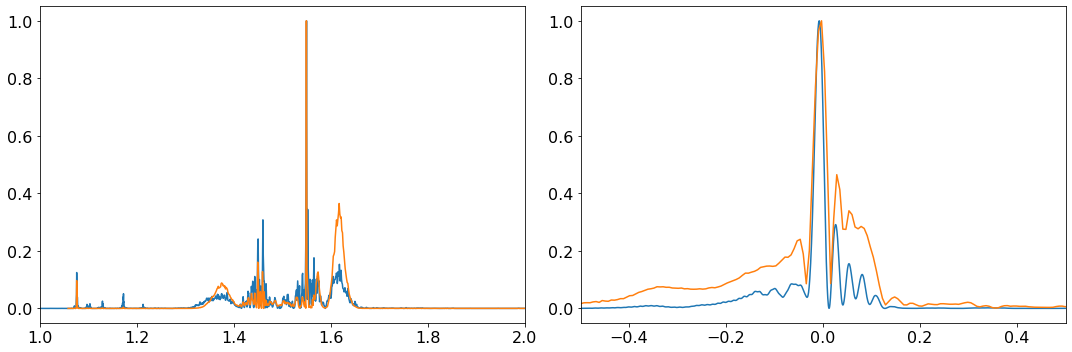

In [2]:
# it checks out
pulse_temp = get_data('temp')
pulse_spec = get_data('spec')
indices = np.where(pulse_spec.wl_nm >= 0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(pulse_temp.wl_um[indices], normalize(abs(pulse_temp.AW[indices]) ** 2))
ax1.plot(data_spec[:, 2], normalize(data_spec[:, 0]))
ax1.set_xlim(1, 2)
ax2.plot(pulse_spec.T_ps, normalize(abs(pulse_spec.AT) ** 2))
ax2.plot(data_temp[:, 2] / 1000, data_temp[:, 0])
ax2.set_xlim(-.5, .5)

Pulse energy before None : 1.4 nJ
pulse energy in  70883.37113614137
copied as   70883.37113614137
Step: 1 Distance remaining: 0.00099
Pulse energy after: 1.3866040700298268 nJ
Step: 2 Distance remaining: 0.00098
Pulse energy after: 1.388295001997441 nJ
Step: 3 Distance remaining: 0.0009699999999999999
Pulse energy after: 1.3876220250167601 nJ
Step: 4 Distance remaining: 0.00096
Pulse energy after: 1.3871923017047043 nJ
Step: 5 Distance remaining: 0.00095
Pulse energy after: 1.3875446103621891 nJ
Step: 6 Distance remaining: 0.00094
Pulse energy after: 1.386595963810282 nJ
Step: 7 Distance remaining: 0.0009299999999999999
Pulse energy after: 1.3869239980967718 nJ
Step: 8 Distance remaining: 0.00092
Pulse energy after: 1.3885486059561718 nJ
Step: 9 Distance remaining: 0.00091
Pulse energy after: 1.3862492915198394 nJ
Step: 10 Distance remaining: 0.0009000000000000001
Pulse energy after: 1.3851894564767626 nJ
Step: 11 Distance remaining: 0.0008900000000000001
Pulse energy after: 1.3878923

Pulse energy after: 1.3915034352341153 nJ
Step: 96 Distance remaining: 4.000000000000004e-05
Pulse energy after: 1.3918477110065857 nJ
Step: 97 Distance remaining: 3.0000000000000028e-05
Pulse energy after: 1.3914358390810162 nJ
Step: 98 Distance remaining: 2.000000000000002e-05
Pulse energy after: 1.3919942937628604 nJ
Step: 99 Distance remaining: 1.000000000000001e-05
Pulse energy after: 1.391499263590373 nJ
Pulse energy after None : 1.3999081722375482 nJ
Pulse energy before None : 1.4 nJ
pulse energy in  70883.37113614137
copied as   70883.37113614137
Step: 1 Distance remaining: 0.00099
Pulse energy after: 1.3866040700298268 nJ
Step: 2 Distance remaining: 0.00098
Pulse energy after: 1.388295001997441 nJ
Step: 3 Distance remaining: 0.0009699999999999999
Pulse energy after: 1.3876220250167601 nJ
Step: 4 Distance remaining: 0.00096
Pulse energy after: 1.3871923017047043 nJ
Step: 5 Distance remaining: 0.00095
Pulse energy after: 1.3875446103621891 nJ
Step: 6 Distance remaining: 0.00094


Pulse energy after: 1.3914770844505933 nJ
Step: 92 Distance remaining: 7.999999999999997e-05
Pulse energy after: 1.3913053715219175 nJ
Step: 93 Distance remaining: 6.999999999999995e-05
Pulse energy after: 1.3921545946601284 nJ
Step: 94 Distance remaining: 6.0000000000000056e-05
Pulse energy after: 1.3918096644039732 nJ
Step: 95 Distance remaining: 5.000000000000004e-05
Pulse energy after: 1.3917958721253778 nJ
Step: 96 Distance remaining: 4.000000000000004e-05
Pulse energy after: 1.3926297399040646 nJ
Step: 97 Distance remaining: 3.0000000000000028e-05
Pulse energy after: 1.3921734754633974 nJ
Step: 98 Distance remaining: 2.000000000000002e-05
Pulse energy after: 1.3913000913327493 nJ
Step: 99 Distance remaining: 1.000000000000001e-05
Pulse energy after: 1.3922698114077174 nJ
Pulse energy after None : 1.3998986939357447 nJ
Pulse energy before None : 1.4 nJ
pulse energy in  70883.37113614137
copied as   70883.37113614137
Step: 1 Distance remaining: 0.00099
Pulse energy after: 1.3866040

Pulse energy after: 1.3905841318913945 nJ
Step: 87 Distance remaining: 0.00013000000000000002
Pulse energy after: 1.3918063222825983 nJ
Step: 88 Distance remaining: 0.00012
Pulse energy after: 1.3914207176558573 nJ
Step: 89 Distance remaining: 0.00010999999999999999
Pulse energy after: 1.3910316134068872 nJ
Step: 90 Distance remaining: 9.999999999999998e-05
Pulse energy after: 1.391293689503799 nJ
Step: 91 Distance remaining: 8.999999999999997e-05
Pulse energy after: 1.3907545099171836 nJ
Step: 92 Distance remaining: 7.999999999999997e-05
Pulse energy after: 1.3914883344693232 nJ
Step: 93 Distance remaining: 6.999999999999995e-05
Pulse energy after: 1.3918622768040736 nJ
Step: 94 Distance remaining: 6.0000000000000056e-05
Pulse energy after: 1.3918143988563656 nJ
Step: 95 Distance remaining: 5.000000000000004e-05
Pulse energy after: 1.3911681130649296 nJ
Step: 96 Distance remaining: 4.000000000000004e-05
Pulse energy after: 1.3903145323191528 nJ
Step: 97 Distance remaining: 3.000000000

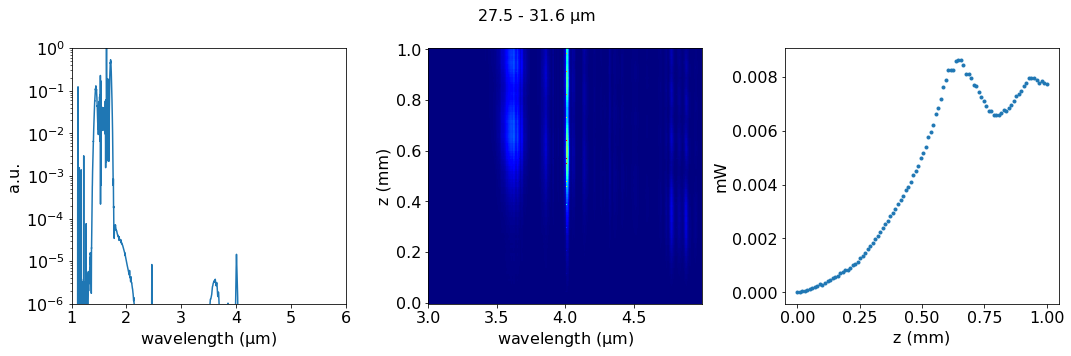

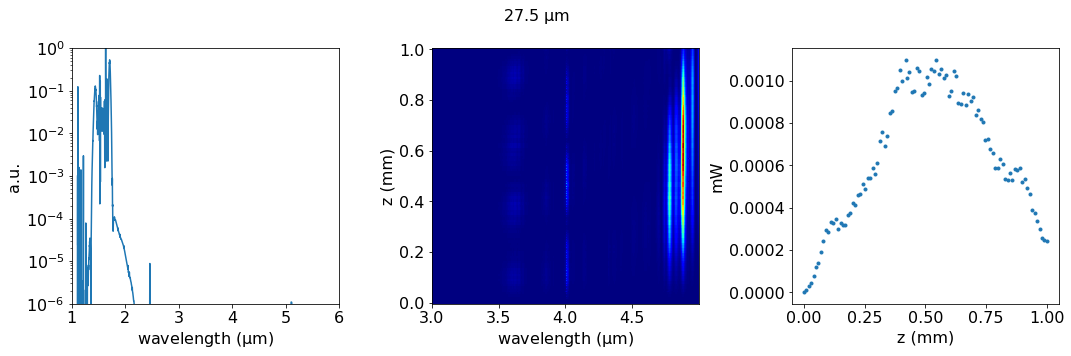

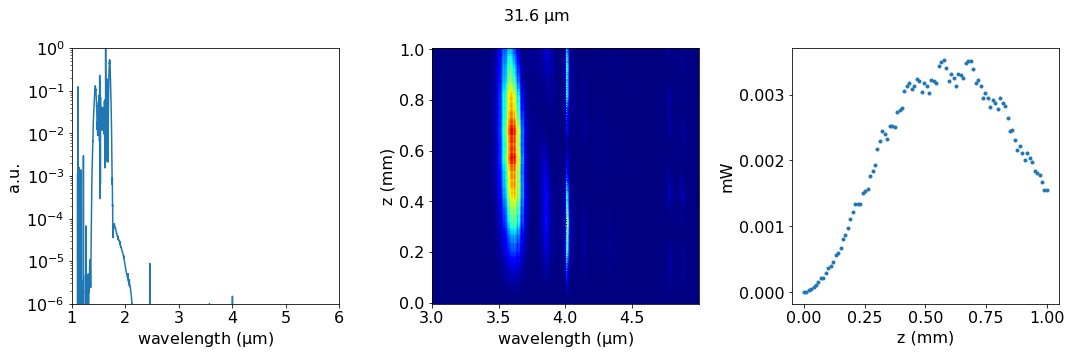

In [3]:
pulse = get_data('spec')


def sim_poling_period(poling_period, plotting=True, title=None):
    ppln = fpn.PPLN()
    ppln.generate_ppln(pulse, .001, 1550, poling_period)

    ssfm = fpn.PPLNThreeWaveMixing()
    sim_ppln = ssfm.propagate(pulse, ppln, 100)

    evol = Evol(sim_ppln)
    if plotting:
        plot(evol, title)
    return sim_ppln, evol


def plot(evol, title=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    evol.plot_1dwindow(ax1)
    evol.plot_2dwindow(3, 5, ax2)
    evol.plot_power_in_window(3, 5, ax3)
    if title is not None:
        fig.suptitle(title)


sim_appln, evol_appln = sim_poling_period(appln_poling_period(27.5, 31.6), plotting=True,
                                          title='27.5 - 31.6 $\mathrm{\mu m}$')
sim_27_5, evol_27_5 = sim_poling_period(constant_poling_period(27.5), plotting=True,
                                        title='27.5 $\mathrm{\mu m}$')
sim_31_6, evol_31_6 = sim_poling_period(constant_poling_period(31.6), plotting=True,
                                        title='31.6 $\mathrm{\mu m}$')


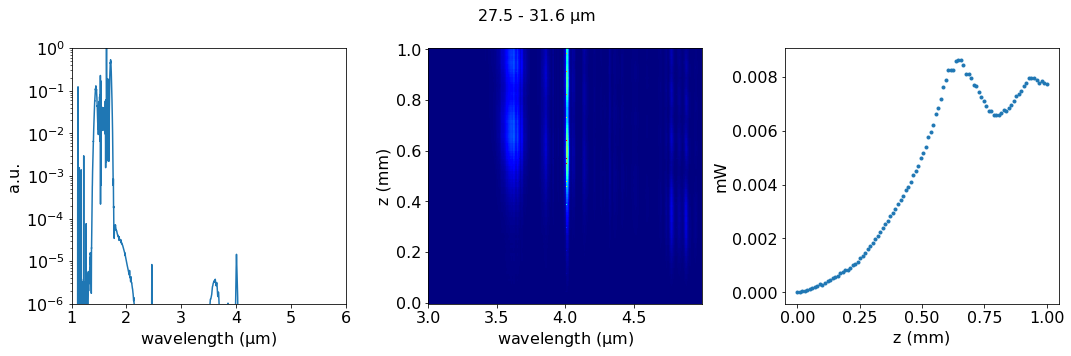

In [4]:
plot(evol_appln, title='27.5 - 31.6 $\mathrm{\mu m}$')

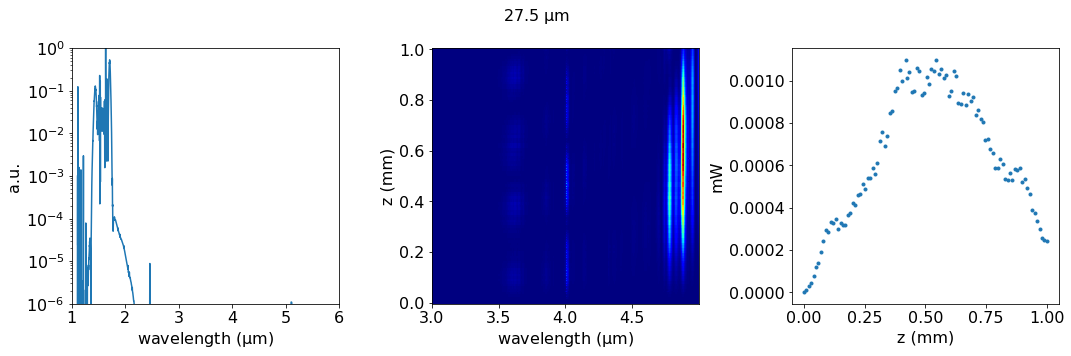

In [5]:
plot(evol_27_5, title='27.5 $\mathrm{\mu m}$')

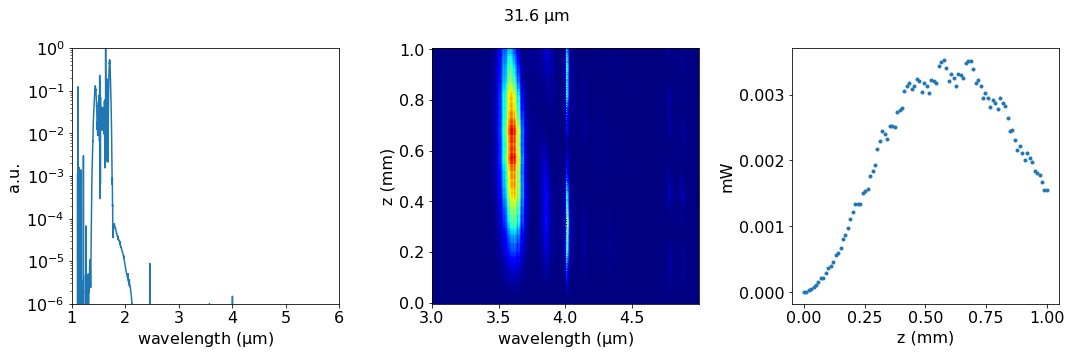

In [6]:
plot(evol_31_6, title='31.6 $\mathrm{\mu m}$')

# Thinking about Phase Matching

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import clipboard_and_style_sheet
from pynlo.media.crystals.XTAL_PPLN import DengSellmeier

clipboard_and_style_sheet.style_sheet()

ppln = DengSellmeier(24.5)
c = 299792458  # m/s


# smaller wavelength, higher wavelength -> phase mismatch in 1/um
def phase_mismatch(wl1_um, wl2_um):
    wl1_nm = wl1_um * 1e3
    wl2_nm = wl2_um * 1e3
    n1 = ppln.n(wl1_nm)
    n2 = ppln.n(wl2_nm)
    k1 = n1 / wl1_um
    k2 = n2 / wl2_um

    wl3_um = 1 / ((1 / wl1_um) - (1 / wl2_um))
    wl3_nm = wl3_um * 1e3
    n3 = ppln.n(wl3_nm)
    k3 = n3 / wl3_um
    return k1 - k2 - k3, wl3_um


wl2 = 1.56  # 1560 nm
wl1 = np.linspace(.7, 1.25, 5000)
dk, dfgwl = phase_mismatch(wl1, wl2)

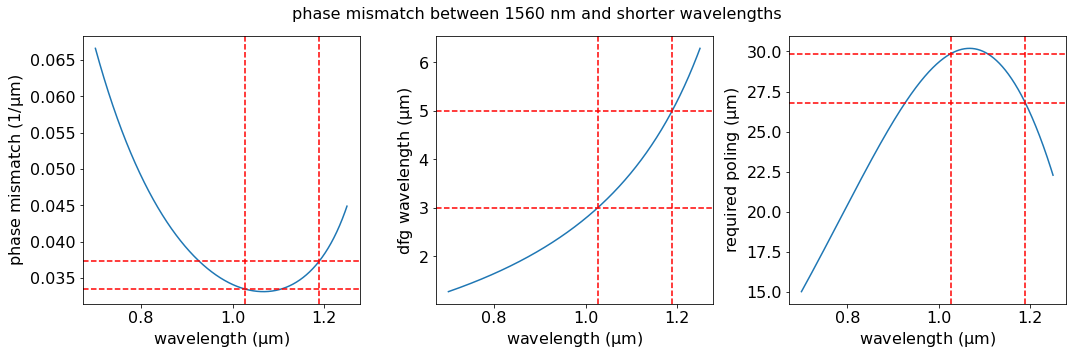

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(wl1, dk)
ax2.plot(wl1, dfgwl)
# ax3.plot(wl1, ppln.n(wl1 * 1e3))
ax3.plot(wl1, 1 / dk)

[i.set_xlabel("wavelength ($\mathrm{\mu m}$)") for i in [ax1, ax2, ax3]]
ax1.set_ylabel("phase mismatch ($1/\mathrm{\mu m}$)")
ax2.set_ylabel("dfg wavelength ($\mathrm{\mu m}$)")
# ax3.set_ylabel("PPLN index of refraction")
ax3.set_ylabel("required poling ($\mathrm{\mu m}$)")
fig.suptitle("phase mismatch between 1560 nm and shorter wavelengths")

ll = np.argmin(abs(dfgwl - 3))
ul = np.argmin(abs(dfgwl - 5))
ax1.axhline(dk[ll], color='r', linestyle='--')
ax1.axhline(dk[ul], color='r', linestyle='--')
ax2.axhline(dfgwl[ll], color='r', linestyle='--')
ax2.axhline(dfgwl[ul], color='r', linestyle='--')
ax3.axhline(1 / dk[ll], color='r', linestyle='--')
ax3.axhline(1 / dk[ul], color='r', linestyle='--')

ax1.axvline(wl1[ll], color='r', linestyle='--')
ax1.axvline(wl1[ul], color='r', linestyle='--')
ax2.axvline(wl1[ll], color='r', linestyle='--')
ax2.axvline(wl1[ul], color='r', linestyle='--')
ax3.axvline(wl1[ll], color='r', linestyle='--')
ax3.axvline(wl1[ul], color='r', linestyle='--')


So, we should try to get light out to between 1 and 1.2 $\mathrm{\mu m}$, after which the poling period of the PPLN should take care of the rest.

I think that this also goes to show, that I think what Nazanin brought up in the last conversation is a good point. We struggle with getting red of the spike at 1560 nm. Ideally if you have a perfect $sech$ pulse, SPM in the fiber should move power from that region out to the wings. If we can't get rid of it, however, we should try to do DFG with one of the main interacting wavelengths being 1560 nm. 